In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
gh = pd.read_csv('ghg.csv')
#source = https://ourworldindata.org/grapher/ghg-emissions-by-gas

In [4]:
gh.head(3)

,Entity,Code,Year,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
0,Afghanistan,AFG,1850,223767.00,3594926.5,3480800.0
1,Afghanistan,AFG,1851,228426.77,3615134.5,3529653.5
2,Afghanistan,AFG,1852,232966.61,3635346.8,3554080.0


In [5]:
sel = (gh['Entity'] == 'World') & (gh['Year'] >= 1880) & (gh['Year'] <= 2016)
df = gh[sel]

In [6]:
df.head(3)

,Entity,Code,Year,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
41310,World,OWID_WRL,1880,252078640.0,1.544128e+09,3.948692e+09
41311,World,OWID_WRL,1881,254855100.0,1.561731e+09,3.973954e+09
41312,World,OWID_WRL,1882,257243630.0,1.579700e+09,4.085563e+09


In [7]:
len(df)

137

In [8]:
corr = pd.read_csv('corr.csv')
len(corr)
#corr.head(3)

137

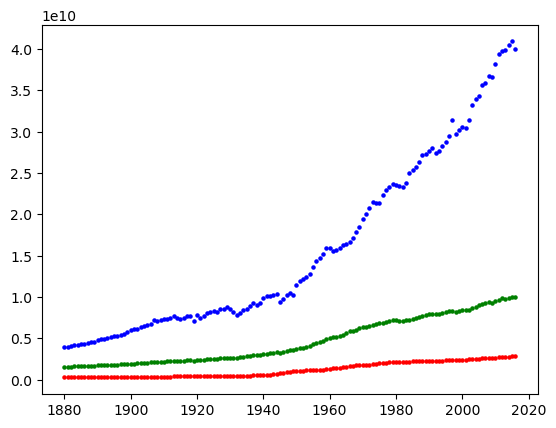

In [9]:
plt.scatter(x=df['Year'], y=df['Annual nitrous oxide emissions in CO2 equivalents'], s= 5, color = 'red')
plt.scatter(x=df['Year'], y=df['Annual methane emissions in CO2 equivalents'], s= 5, color = 'green')
plt.scatter(x=df['Year'], y=df['Annual CO2 emissions'], s= 5, color = 'blue')

In [10]:
merged_df = pd.merge(corr, df, on='Year', how='inner')
merged_df.rename(columns={'Mean': 'Global Temperature'}, inplace=True)
merged_df

,Source,Year,Global Temperature,Decade,Tasa_de_Cambio,Entity,Code,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
0,GISTEMP,1880,-0.20,1880,NaN,World,OWID_WRL,2.520786e+08,1.544128e+09,3.948692e+09
1,GISTEMP,1881,-0.12,1880,0.008,World,OWID_WRL,2.548551e+08,1.561731e+09,3.973954e+09
2,GISTEMP,1882,-0.10,1880,0.002,World,OWID_WRL,2.572436e+08,1.579700e+09,4.085563e+09
3,GISTEMP,1883,-0.21,1880,-0.011,World,OWID_WRL,2.593222e+08,1.599338e+09,4.205575e+09
4,GISTEMP,1884,-0.28,1880,-0.007,World,OWID_WRL,2.611689e+08,1.611313e+09,4.236491e+09
...,...,...,...,...,...,...,...,...,...,...
132,GISTEMP,2012,0.63,2010,0.003,World,OWID_WRL,2.771783e+09,9.812516e+09,3.980888e+10
133,GISTEMP,2013,0.65,2010,0.002,World,OWID_WRL,2.760305e+09,9.800974e+09,3.992178e+10
134,GISTEMP,2014,0.74,2010,0.009,World,OWID_WRL,2.789930e+09,9.893349e+09,4.047206e+10
135,GISTEMP,2015,0.87,2010,0.013,World,OWID_WRL,2.799329e+09,9.941571e+09,4.091958e+10


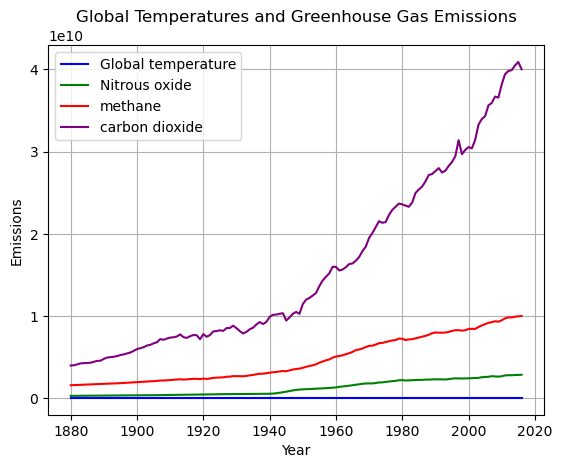

In [11]:
plt.plot(merged_df['Year'], merged_df['Global Temperature'], label='Global temperature', color='blue')

# Graficar las emisiones de los diferentes gases
plt.plot(merged_df['Year'], merged_df['Annual nitrous oxide emissions in CO2 equivalents'], label='Nitrous oxide', color='green')
plt.plot(merged_df['Year'], merged_df['Annual methane emissions in CO2 equivalents'], label='methane', color='red')
plt.plot(merged_df['Year'], merged_df['Annual CO2 emissions'], label='carbon dioxide', color='purple')

# Etiquetas y título del gráfico
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Global Temperatures and Greenhouse Gas Emissions')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Normalizacion

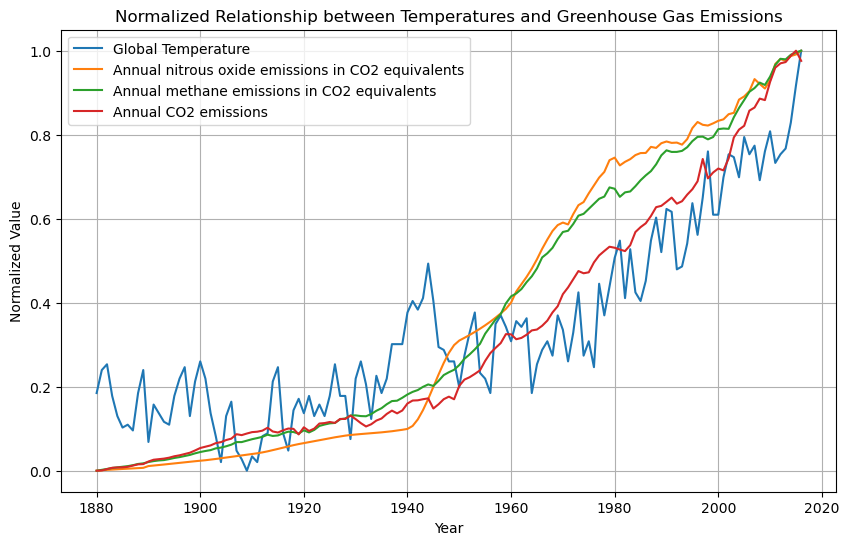

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Normalizar las columnas que deseas trazar
cols_to_normalize = ['Global Temperature', 'Annual nitrous oxide emissions in CO2 equivalents', 
                    'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions']
df_normalized = merged_df.copy()  # Crear una copia del DataFrame original
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las columnas normalizadas
for col in cols_to_normalize:
    plt.plot(df_normalized['Year'], df_normalized[col], label=col)

# Etiquetas y título del gráfico
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized Relationship between Temperatures and Greenhouse Gas Emissions')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


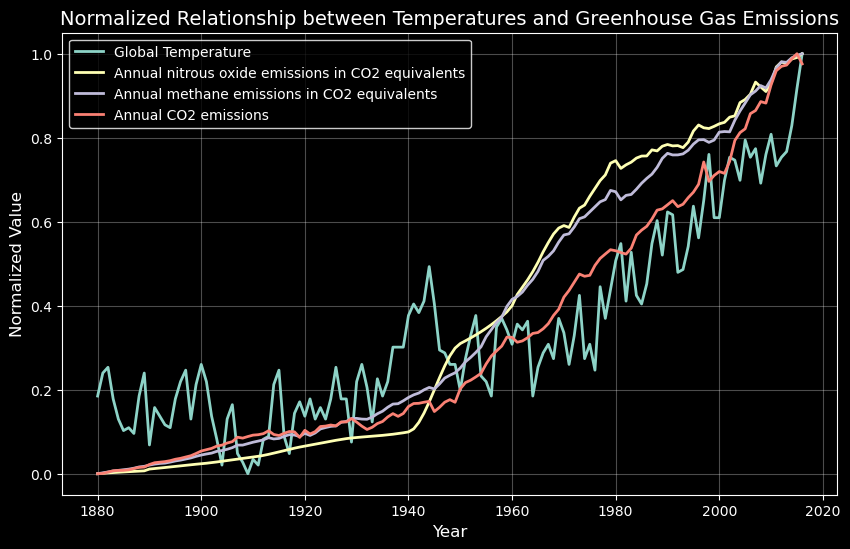

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Normalizar las columnas que deseas trazar
cols_to_normalize = ['Global Temperature', 'Annual nitrous oxide emissions in CO2 equivalents', 
                    'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions']
df_normalized = merged_df.copy()  # Crear una copia del DataFrame original
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Cambiar el estilo del fondo
plt.style.use('dark_background')

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las columnas normalizadas
for col in cols_to_normalize:
    plt.plot(df_normalized['Year'], df_normalized[col], label=col, linewidth=2)

# Etiquetas y título del gráfico
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.title('Normalized Relationship between Temperatures and Greenhouse Gas Emissions', fontsize=14)
plt.legend(fontsize=10)

# Cambiar colores y estilo de los ejes
plt.tick_params(axis='both', which='both', labelsize=10, colors='white')

# Cambiar el color de fondo de las etiquetas de los ejes
ax = plt.gca()
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Cambiar el color de fondo de la leyenda
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')

# Mostrar el gráfico
plt.grid(True, alpha=0.3)
plt.show()


# CORRELATION